<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [19]:
import seaborn as sns #importa a biblioteca seaborn

data = sns.load_dataset("diamonds") #carrega o dataset "diamonds"
data.head() #mostra as primeiras linhas do dataset para dar uma ideia dos dados.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


[Text(0.5, 1.0, 'Boxplot dos preços de diamantes')]

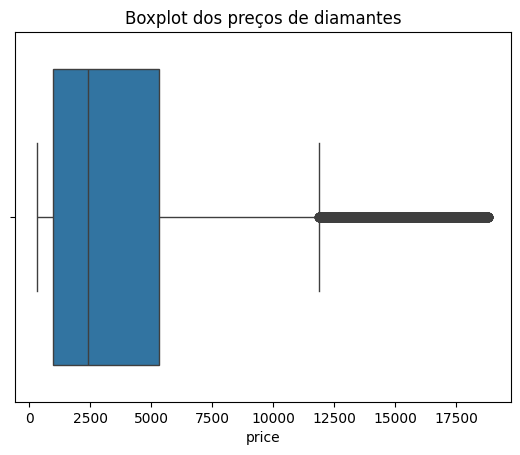

In [20]:
# gráfico do exercício 1

diamonds = sns.boxplot(x = data['price']) #cria um boxplot para a coluna 'price' do dataset 'diamonds'.
diamonds.set(title = 'Boxplot dos preços de diamantes') #Define o título do gráfico.

**Insight do gráfico 1**: A análise dos preços dos diamantes revela que aproximadamente metade deles está na faixa de 1000 a 5000. No entanto, existem outliers com valores acima de 11000, provavelmente correspondendo a diamantes raros ou excepcionais.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [22]:
import seaborn as sns #importa a biblioteca seaborn

data = sns.load_dataset("diamonds") #carrega o dataset "diamonds"
data.head() #mostra as primeiras linhas do dataset para dar uma ideia dos dados.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


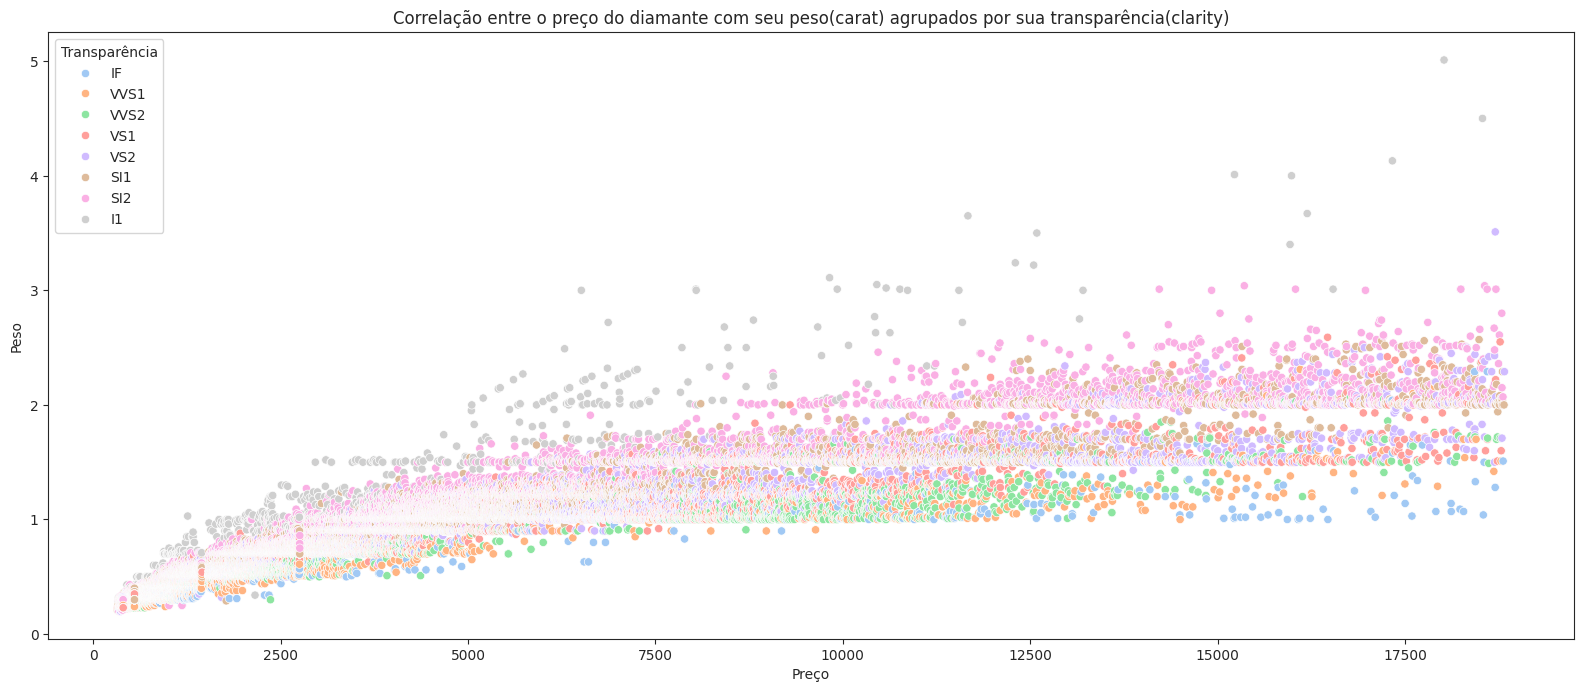

In [24]:
# gráfico do exercício 2

diamonds = data[['carat', 'clarity', 'price']] #seleciona as colunas 'carat', 'clarity' e 'price' do dataset.
diamonds.head() #mostra as primeiras linhas do subconjunto de dados selecionado.

with sns.axes_style('ticks'): #define o estilo dos eixos do gráfico como 'ticks'.
    #cria um scatterplot (gráfico de dispersão) para 'price' no eixo x, 'carat' no eixo y, colorindo os pontos pela variável 'clarity' com a paleta 'pastel'.
    grafico = sns.scatterplot(data = diamonds, x = 'price', y = 'carat', hue = 'clarity', palette = 'pastel')
    #define o título e os rótulos dos eixos do gráfico.
    grafico.set(title = 'Correlação entre o preço do diamante com seu peso(carat) agrupados por sua transparência(clarity)', xlabel = 'Preço', ylabel = 'Peso')
    #define o tamanho da figura
    grafico.figure.set_size_inches(w = 50/2.54, h = 20/2.54)
    grafico.get_legend().set_title('Transparência') #define o título da legenda do gráfico.

**Insight do gráfico 2**: Observou-se que, quanto menor o peso e maior o preço do diamante, mais provável é que ele tenha clareza "IF, VVS1, VVS2". No intervalo de peso entre 1,5 e 2,0 quilates, aumentam as chances de o diamante apresentar clareza "VS1, VS2, SI1, SI2, I1". Para pesos acima de 3,0 quilates, os diamantes tendem a ter clareza I1, e o gráfico indica que o preço dos diamantes dessa clareza está correlacionado com o peso, mostrando que, quanto maior o peso, maior o preço.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [25]:
import seaborn as sns #importa a biblioteca seaborn

data = sns.load_dataset("mpg") #carrega o dataset "mpg"
data.head() #mostra as primeiras linhas do dataset para dar uma ideia dos dados.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


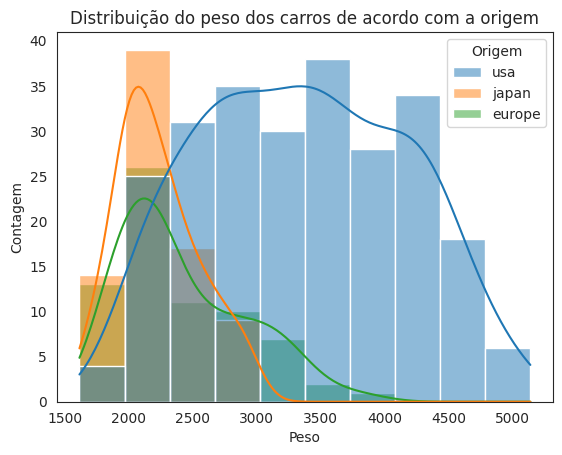

In [27]:
# gráfico do exercício 3

cars = data[['weight', 'origin']] #seleciona as colunas 'weight' e 'origin' do dataset.

with sns.axes_style('white'): #define o estilo dos eixos do gráfico como 'white'.
    #cria um histograma para 'weight' com linhas de densidade (kde) e diferenciando as barras pela variável 'origin'.
    grafico = sns.histplot(data = cars, x = 'weight', hue = 'origin', kde = True)
    #define o título e os rótulos dos eixos do gráfico.
    grafico.set(title = 'Distribuição do peso dos carros de acordo com a origem', xlabel = 'Peso', ylabel = 'Contagem')
    grafico.get_legend().set_title('Origem') #define o título da legenda do gráfico.

**Insight do gráfico 3**: Os carros japoneses são mais leves, pesando entre 1500 kg e 2000 kg. A partir de 2500 kg, os carros de origem europeia e japonesa apresentam uma grande queda, chegando a 0. No entanto, os carros americanos continuam presentes, representando a maior porcentagem.

---